## Waste Management uding CNN Model

In [11]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install numpy pandas matplotlib opencv-python tqdm



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_path ="dataset/TRAIN"
test_path="dataset/TEST"

In [16]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [17]:

from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        if img_array is None:
            print(f"Error loading image: {file}")
            continue
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

# Create DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Check the DataFrame
print(data.head())

100%|██████████| 9999/9999 [02:41<00:00, 62.06it/s]


                                               image    label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...  TRAIN\O
2  [[[224, 224, 224], [229, 229, 229], [236, 236,...  TRAIN\O
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  TRAIN\O


In [18]:
data.shape

(22564, 2)

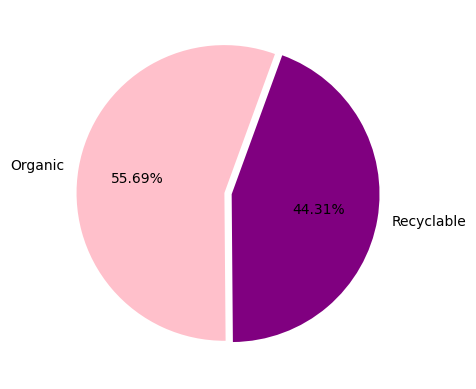

In [30]:
colors=['pink', 'purple']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle=70, explode=[0.05,0.00])
plt.show()